### `Time Series Analysis in Python | Moving Average (MA) and ARMA Models`

#### `01: Simulate MA(1) Time Series`
You will simulate and plot a few MA(1) time series, each with a different parameter, theta, using the `arima_process` module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive theta and a large negative theta.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with theta = -0.9 , the array representing the MA parameters would be `ma = np.array([1, -0.9]`)



- Import the class `ArmaProcess` in the `arima_process` module.
- Plot the simulated MA(1) processes
  - Let `ma1` represent an array of the MA parameters [1, theta] as explained above. The AR parameter array will contain just the lag-zero coefficient of one.
  - With parameters `ar1` and `ma1`, create an instance of the class `ArmaProcess(ar,ma)` called `MA_object1`.
  - Simulate 1000 data points from the object you just created, `MA_object1`, using the method `.generate_sample()`. Plot the simulated data in a subplot.
- Repeat for the other MA parameter.

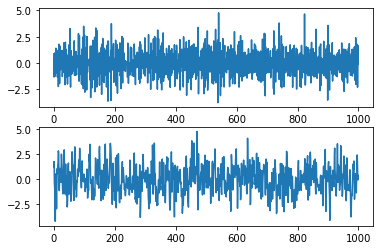

In [11]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.



### `02: Compute the ACF for Several MA Time Series`

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not theta, but rather theta/(1+theta^2) For example, if the MA parameter theta, is = +0.9, the first-lag autocorrelation will be 0.9/(1+(0.9)^2) = 0.497  and the autocorrelation at all other lags will be zero. If the MA parameter theta, is -0.9, the first-lag autocorrelation will be - 0.9/(1+(-0.9)^2) = -0.497

You will verify these autocorrelation functions for the three time series you generated in the last exercise.


- `simulated_data_1` is the first simulated time series with an MA parameter of theta = -0.9.
- Compute the autocorrelation function of `simulated_data_1` using the `plot_acf` function with 20 lags.

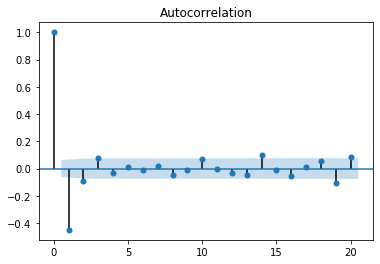

In [12]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

- `simulated_data_2` is the second simulated time series with an MA parameter of theta=-0.9
- Compute the autocorrelation function using the `plot_acf` function with `lags=20`.

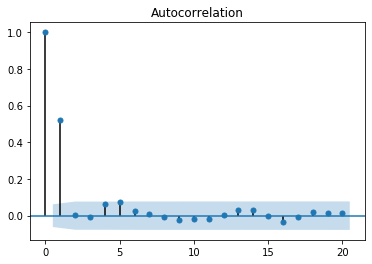

In [13]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

- `simulated_data_3` is the third simulated time series with an MA parameter of theta=-0.3
- Compute the autocorrelation function using the `plot_acf()` function with 20 lags.

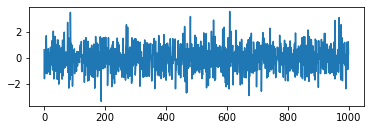

In [14]:
# Plot 1: MA parameter = -0.3
plt.subplot(2,1,1)
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)


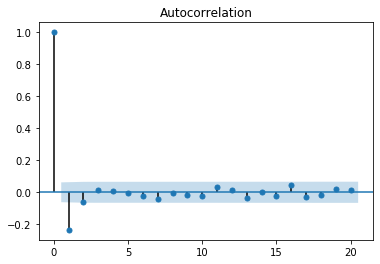

In [15]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

#### `03: Match ACF with MA Model`
Here are four Autocorrelation plots:

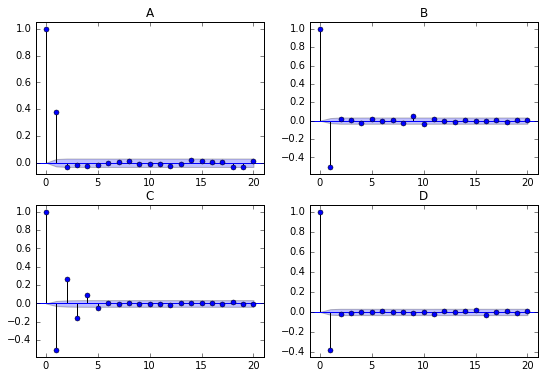

- Which figure corresponds to an MA(1) model with an MA parameter of -0.5
    - A
    - B
    - C 
    - `D`

#### `04: Estimating an MA Model`
You will estimate the MA(1) parameter theta, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true theta of -0.9, you will print out the estimate of. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.


- Import the class `ARIMA` in the module `statsmodels.tsa.arima.model`.
- Create an instance of the `ARIMA` class called `mod` using the simulated data `simulated_data_1` and the order (p,d,q) of the model (in this case, for an MA(1)), is `order=(0,0,1)`.
- Fit the model `mod` using the method `.fit()` and save it in a results object called `res`.
- Print out the entire summary of results using the `.summary()` method.
- Just print out an estimate of the theta parameter using the `.params[1]` attribute.

In [16]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1399.689
Date:                Sat, 22 Apr 2023   AIC                           2805.378
Time:                        18:09:42   BIC                           2820.102
Sample:                             0   HQIC                          2810.974
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.516      0.606      -0.004       0.007
ma.L1         -0.9113      0.013    -67.514      0.000      -0.938      -0.885
sigma2         0.9605      0.043     22.522      0.0

#### `05: Forecasting with MA Model`
As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using the `plot_predict()` function in statsmodels.

For the simulated series `simulated_data_1` with theta = -0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

- Import the class `ARIMA` and also import the function `plot_predict`
- Create an instance of the `ARIMA` class called `mod` using the simulated data `simulated_data_1` and the (p,d,q) order of the model (in this case, for an MA(1)), `order=(0,0,1)`
  - Fit the model `mod` using the method `.fit()` and save it in a results object called `res`
- Plot the in-sample data starting with data point 950
- Plot out-of-sample forecasts of the data and confidence intervals using the `plot_predict()` function, starting with data point 950 and ending the forecast at point 1010

In [18]:
simulated_data_1 = pd.DataFrame(simulated_data_1)

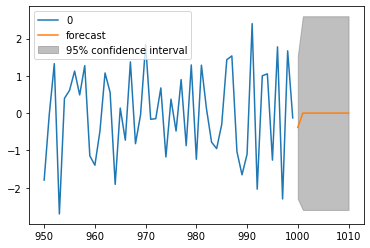

In [19]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

#### `06: High Frequency Stock Prices`
Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame `intraday` contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the `DATE` column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see here on how the data was downloaded).

The `datetime` module has already been imported for you.



- Manually change the first date to zero using `.iloc[0,0]`.
- Change the two column headers to `'DATE'` and `'CLOSE'` by setting `intraday.columns` equal to a list containing those two strings.
- Use the pandas attribute `.dtypes` (no parentheses) to see what type of data are in each column.
- Convert the `'DATE'` column to numeric using the pandas function `to_numeric()`.
- Make the `'DATE'` column the new index of `intraday` by using the pandas method `.set_index()`, which will take the string `'DATE'` as its argument (not the entire column, just the name of the column).

In [20]:
intraday = pd.read_csv("datasets/intraday.csv")
intraday

,0,1
0,a1504272600,8.290
1,1,8.270
2,2,8.280
3,3,8.275
4,4,8.287
...,...,...
384,386,8.275
385,387,8.280
386,388,8.275
387,389,8.275


In [21]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


In [22]:
intraday.head()

,CLOSE
DATE,
0,8.290
1,8.270
2,8.280
3,8.275
4,8.287


#### `07: More Data Cleaning: Missing Data`
When you print out the length of the DataFrame `intraday`, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

- Print out the length of `intraday` using `len()`.



In [23]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


- Find the missing rows by making `range(391)` into a set and then subtracting the set of the intraday index, `intraday.index.`



In [24]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday 

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


- Fill in the missing rows using the `.reindex()` method, setting the index equal to the full `range(391)` and forward filling the missing data by setting the `method` argument to `'ffill'`.



In [28]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

- Change the index to times using pandas function `date_range()`, starting with `'2017-09-01 9:30'` and ending with `'2017-09-01 16:00'` and passing the argument `freq='1min'`.
- Plot the data and include gridlines.


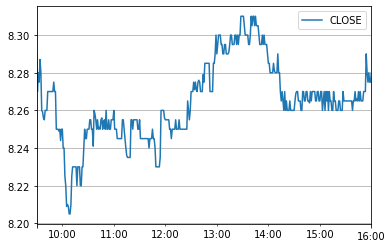

In [29]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

- Missing data is common with high frequency financial time series, so good job fixing that.

### `08: Applying an MA Model`
The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the `intraday` stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.


- Import `plot_acf` and `ARIMA` modules from statsmodels
- Compute minute-to-minute returns from prices:
    - Compute returns with the `.pct_change()` method
    - Use the pandas method `.dropna()` to drop the first row of returns, which is NaN
- Plot the ACF function with lags up to 60 minutes
- Fit the returns data to an MA(1) model and print out the MA(1) parameter

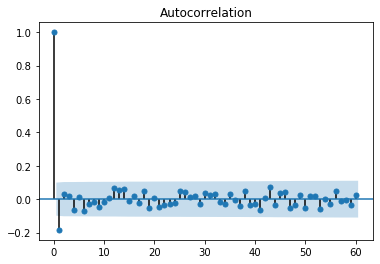

-0.1717956661262548


In [30]:
# Import plot_acf and ARIMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns, order=(0,0,1))
res = mod.fit()
print(res.params[1])

- Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.



#### `09: Equivalence of AR(1) and MA(infinity)`
To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA(infinite) model with the appropriate parameters.

You will simulate an MA model with parameters 0.8, 0.8^2, 0.8^3 ... for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with theta=0.8

Note, to raise a number `x` to the power of an exponent `n`, use the format `x**n`.

- Import the modules for simulating data and plotting the ACF from statsmodels
- Use a list comprehension to build a list with `exponentially` decaying MA parameters: 0.8, 0.8^2, 0.8^3, ....
- Simulate 5000 observations of the MA(30) model
- Plot the ACF of the simulated series

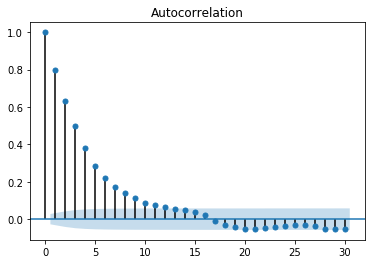

In [33]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

Notice that the ACF looks the same as an AR(1) with parameter 0.8.

